# Method For Converting dcm to jpg and do prediction

In [1]:
import os
import cv2 as cv
import numpy as np
import pydicom as PDCM

ModuleNotFoundError: No module named 'cv2'

  Could not find a version that satisfies the requirement cv2 (from versions: )
No matching distribution found for cv2


In [23]:
def Dicom_to_Image(Path):

    DCM_Img = PDCM.read_file(Path)

    rows = DCM_Img.get(0x00280010).value #Get number of rows from tag (0028, 0010)
    cols = DCM_Img.get(0x00280011).value #Get number of cols from tag (0028, 0011)

    Instance_Number = int(DCM_Img.get(0x00200013).value) #Get actual slice instance number from tag (0020, 0013)

    Window_Center = int(float(DCM_Img.get(0x00281050).value)) #Get window center from tag (0028, 1050)
    Window_Width = int(float(DCM_Img.get(0x00281051).value)) #Get window width from tag (0028, 1051)

    Window_Max = int(Window_Center + Window_Width / 2)
    Window_Min = int(Window_Center - Window_Width / 2)

    if (DCM_Img.get(0x00281052) is None):
        Rescale_Intercept = 0
    else:
        Rescale_Intercept = int(DCM_Img.get(0x00281052).value)

    if (DCM_Img.get(0x00281053) is None):
        Rescale_Slope = 1
    else:
        Rescale_Slope = int(DCM_Img.get(0x00281053).value)

    New_Img = np.zeros((rows, cols), np.uint64)
    Pixels = DCM_Img.pixel_array

    for i in range(0, rows):
        for j in range(0, cols):
            Pix_Val = Pixels[i][j]
            Rescale_Pix_Val = Pix_Val * Rescale_Slope + Rescale_Intercept

            if (Rescale_Pix_Val > Window_Max): #if intensity is greater than max window
                New_Img[i][j] = 255
            elif (Rescale_Pix_Val < Window_Min): #if intensity is less than min window
                New_Img[i][j] = 0
            else:
                New_Img[i][j] = int(((Rescale_Pix_Val - Window_Min) / (Window_Max - Window_Min)) * 255) #Normalize the intensities

#     return New_Img, Instance_Number

#     Output_Image,

    cv.imwrite(str(Instance_Number - 1).zfill(4) + '.jpg', New_Img)
    
    from tensorflow.keras.preprocessing import image
    from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

    # load model
    from tensorflow.keras.models import load_model
    model = load_model("BrainTumorProject.h5")

    # upload_img & convert in numpy
    img_path = str(Instance_Number - 1).zfill(4) + '.jpg'
    img = image.load_img(img_path, target_size=(224, 224))
    sh = image.img_to_array(img)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    #predication
    preds = model.predict(x)
    import matplotlib.pyplot as plt
    plt.imshow(sh/255)
    pic = plt.show()
    if preds[0][0] == 0:
        return "No Tumor" ,img_path,pic
    else:
        return "Yes Tumor" ,img_path,pic
    


Insert the path of dcm file

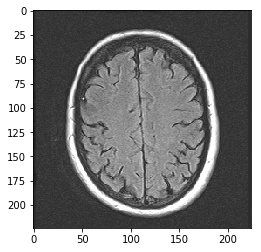

('No Tumor', '0018.jpg', None)

In [36]:
Dicom_to_Image("C:\Users\Hamza Farooq\Downloads\fiver_client\Datasets IRM\Datasets IRM\with tumor\Class 1 With Tumor\series-00000\image-00008.dcm")